In [1]:
from os import listdir
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from PIL import Image
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import random

import keras.backend as K
from keras.models import load_model

Using TensorFlow backend.


In [2]:
def load_photos(directory):
    images = []
    labels_dir = []
    dir_list = listdir(directory)
    random.shuffle(dir_list)
    for name in dir_list:
        filename = directory + '/' + name
        # load an image from file
        image = load_img(filename, target_size=(96, 160))
        # convert the image pixels to a numpy array
        image = img_to_array(image)
        # get image id + labels
        value_dir = float(name.split('_')[0])
        labels_dir.append(value_dir)
        images.append(image)
    return images, labels_dir

In [3]:
dataset = "../../../../Auto"

directory = dataset+'/Val'
images_val, labels_dir_val = load_photos(directory)
nb_images_val = len(images_val)
print('Loaded Images and labels for validation: %d' % nb_images_val)

images_val = np.array(images_val)
images_val /= 255.0

Loaded Images and labels for validation: 210


In [4]:
model_name="model_test.h5"
model = load_model(model_name)

W1129 14:56:05.342343  9476 deprecation_wrapper.py:119] From c:\users\rock_\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:507: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1129 14:56:05.364248  9476 deprecation_wrapper.py:119] From c:\users\rock_\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:3831: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1129 14:56:05.392172  9476 deprecation_wrapper.py:119] From c:\users\rock_\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:238: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1129 14:56:05.393172  9476 deprecation_wrapper.py:119] From c:\users\rock_\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:167: The name tf.get_default_session is depre

In [5]:
#print(model.to_json())

In [6]:
# Get predictions
all_preds = model.predict(images_val)
    
dir_preds = []
for elem in all_preds:
    dir_preds.append(np.argmax(elem))

In [13]:
dir_preds

[2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 0,
 0,
 2,
 0,
 2,
 0,
 0,
 2,
 0,
 2,
 2,
 2,
 0,
 0,
 2,
 2,
 2,
 2,
 0,
 0,
 1,
 2,
 0,
 2,
 2,
 0,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 2,
 2,
 0,
 2,
 2,
 0,
 0,
 0,
 2,
 0,
 0,
 2,
 0,
 2,
 2,
 2,
 0,
 0,
 2,
 0,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 0,
 2,
 0,
 2,
 2,
 2,
 0,
 2,
 2,
 0,
 0,
 2,
 0,
 2,
 2,
 2,
 0,
 0,
 2,
 2,
 0,
 2,
 0,
 0,
 2,
 1,
 1,
 1,
 2,
 1,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 0,
 0,
 1,
 0,
 2,
 0,
 2,
 1,
 0,
 1,
 0,
 2,
 2,
 2,
 2,
 2,
 0,
 0,
 0,
 1,
 2,
 2,
 2,
 2,
 0,
 0,
 2,
 1,
 2,
 2,
 2,
 2,
 0,
 2,
 0,
 2,
 0,
 0,
 2,
 2,
 0,
 0,
 2,
 2,
 2,
 0,
 0,
 2,
 0,
 0,
 2,
 0,
 2,
 2,
 0,
 0,
 0,
 2,
 2,
 0,
 2,
 2,
 0,
 0,
 2,
 2,
 0,
 2,
 0,
 2,
 2,
 0,
 0,
 1,
 0,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0]

In [8]:
res = 0

i_0 = 1
res_0 = 0
res_0_1 = 0
res_0_2 = 0

i_1 = 1
res_1 = 0
res_1_0 = 0
res_1_2 = 0

i_2 = 1
res_2 = 0
res_2_0 = 0
res_2_1 = 0



for value in labels_dir_val:
    if value == 0:
        i_0 += 1
    elif value == 1:
        i_1 += 1
    elif value == 2:
        i_2 += 1

for i, value in enumerate(dir_preds):
    if value != labels_dir_val[i]:
        res += 1
        if labels_dir_val[i] == 0:
            res_0 += 1
            if value == 1:
                res_0_1 += 1
            elif value == 2:
                res_0_2 += 2
        elif labels_dir_val[i] == 1:
            res_1 += 1
            if value == 0:
                res_1_0 += 1
            elif value == 2:
                res_1_2 += 1
        elif labels_dir_val[i] == 2:
            res_2 += 1
            if value == 0:
                res_2_0 += 1
            elif value == 1:
                res_2_1 += 1

print("total error = " + str(res/i), "0_error = " + str(res_0/i_0), "1_error = " + str(res_1/i_1), "2_error = " + str(res_2/i_2))

total error = 0.04784688995215311 0_error = 0.020833333333333332 1_error = 0.42105263157894735 2_error = 0.0


Text(0.5, 1.0, 'Mean Errors by direction')

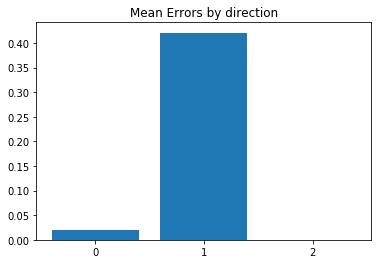

In [9]:
x = ['0','1','2']
plt.bar(x, height= [res_0/i_0, res_1/i_1, res_2/i_2])
plt.xticks(x, ['0','1','2']);
plt.title("Mean Errors by direction")

Text(0.5, 1.0, '0 Errors')

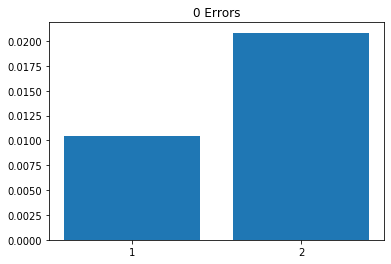

In [10]:
x = ['1','2']
plt.bar(x, height= [res_0_1/i_0, res_0_2/i_0])
plt.xticks(x, ['1','2']);
plt.title("0 Errors")

Text(0.5, 1.0, '1 Errors')

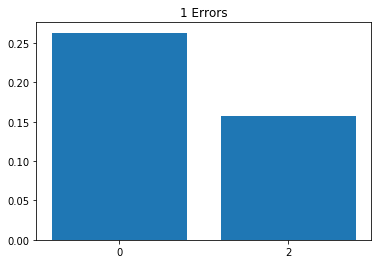

In [11]:
x = ['0','2']
plt.bar(x, height= [res_1_0/i_1, res_1_2/i_1])
plt.xticks(x, ['0','2']);
plt.title("1 Errors")

Text(0.5, 1.0, '2 Errors')

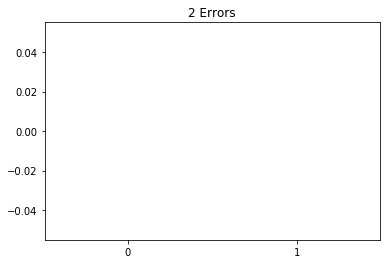

In [12]:
x = ['0','1']
plt.bar(x, height= [res_2_0/i_2, res_2_1/i_2])
plt.xticks(x, ['0','1']);
plt.title("2 Errors")